# IMDB Exploratory Data Analysis

### Importing the required libraries and datasets

###### Libraries used are:

* Pandas: for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.
* Numpy: for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
* Matplotlib: a cross-platform, data visualization and graphical plotting library (histograms, scatter plots, bar charts, etc) for Python.
* Seaborn: a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
* WordCloud: A visualization technique to represent the frequency of words in a text where the size of the word represents its frequency

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

###### Importing the downloaded dataset

In [2]:
imdb_data = pd.read_csv('imdb_top_1000.csv')
imdb_data.head()

Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life and career of Vito Corleone in ...        90.0   
4  A jury holdout attempts to prevent a miscarria...        96.0   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   
3  Francis Ford Coppola       Al Pacino  Robert De Niro  Robert Duvall   
4          Sidney Lumet     Henry Fonda     Lee J. Cobb  Martin Balsam   

            Star4  No_of_Votes        Gross  
0  William Sadler      2343110   28,341,469  
1    Diane Keaton      1620367  134,966,411  
2   Michael Caine      2303232  534,858,444  
3    Diane Keaton      1129952   57,300,000  
4    John Fiedler       689845    4,360,000

* As we don't need the Poster_Link and Overview columns

In [3]:
imdb_data.drop(['Poster_Link','Overview'],axis=1,inplace=True)
imdb_data.head()

Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  Meta_score              Director  \
0                 Drama          9.3        80.0        Frank Darabont   
1          Crime, Drama          9.2       100.0  Francis Ford Coppola   
2  Action, Crime, Drama          9.0        84.0     Christopher Nolan   
3          Crime, Drama          9.0        90.0  Francis Ford Coppola   
4          Crime, Drama          9.0        96.0          Sidney Lumet   

            Star1           Star2          Star3           Star4  No_of_Votes  \
0     Tim Robbins  Morgan Freeman     Bob Gunton  William Sadler      2343110   
1   Marlon Brando       Al Pacino     James Caan    Diane Keaton      1620367   
2  Christian Bale    Heath Ledger  Aaron Eckhart   Michael Caine      2303232   
3       Al Pacino  Robert De Niro  Robert Duvall    Diane Keaton      1129952   
4     Henry Fonda     Lee J. Cobb  Martin Balsam    John Fiedler       689845   

         Gross  
0   28,341,469  
1  134,966,411  
2  534,858,444  
3   57,300,000  
4    4,360,000

In [4]:
print('The shape of the dataset is :\n {} rows and {} columns'.format(imdb_data.shape[0],imdb_data.shape[1]))

The shape of the dataset is :
 1000 rows and 14 columns


In [5]:
# printing the information about the dataframe
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 109.5+ KB


##### Finding the number of null values in each column

In [6]:
imdb_data.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

* null values are present in Certificate, Meta_score and Gross columns

### Treating the null values in Certificate column using mode

In [7]:
imdb_data['Certificate'].mode()

0    U
Name: Certificate, dtype: object

In [8]:
imdb_data['Certificate'].fillna('U',inplace=True)

In [9]:
imdb_data['Certificate'].isnull().sum()

0

### Treating the null values in Gross column

For this we need to change the datatype of Gross column => remove the ',' so that it is easier to change dtype to float without any error and then replacing null values with zero

In [10]:
print(imdb_data['Gross'].head(1))
imdb_data['Gross'] = imdb_data['Gross'].str.replace(',', '')
print(imdb_data['Gross'].head(1))

0    28,341,469
Name: Gross, dtype: object
0    28341469
Name: Gross, dtype: object


In [11]:
imdb_data['Gross'] = imdb_data['Gross'].astype('float64')
imdb_data['Gross'] = imdb_data['Gross'].replace(np.nan, 0)

In [12]:
imdb_data['Gross'] = imdb_data['Gross'].astype(int)
imdb_data.head()

Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  Meta_score              Director  \
0                 Drama          9.3        80.0        Frank Darabont   
1          Crime, Drama          9.2       100.0  Francis Ford Coppola   
2  Action, Crime, Drama          9.0        84.0     Christopher Nolan   
3          Crime, Drama          9.0        90.0  Francis Ford Coppola   
4          Crime, Drama          9.0        96.0          Sidney Lumet   

            Star1           Star2          Star3           Star4  No_of_Votes  \
0     Tim Robbins  Morgan Freeman     Bob Gunton  William Sadler      2343110   
1   Marlon Brando       Al Pacino     James Caan    Diane Keaton      1620367   
2  Christian Bale    Heath Ledger  Aaron Eckhart   Michael Caine      2303232   
3       Al Pacino  Robert De Niro  Robert Duvall    Diane Keaton      1129952   
4     Henry Fonda     Lee J. Cobb  Martin Balsam    John Fiedler       689845   

       Gross  
0   28341469  
1  134966411  
2  534858444  
3   57300000  
4    4360000

In [13]:
imdb_data['Gross'].head()

0     28341469
1    134966411
2    534858444
3     57300000
4      4360000
Name: Gross, dtype: int32

### Treating the null values in Meta_score column

In [14]:
imdb_data['Meta_score'].value_counts()

76.0    32
84.0    29
90.0    29
80.0    27
73.0    27
        ..
28.0     1
36.0     1
46.0     1
30.0     1
41.0     1
Name: Meta_score, Length: 63, dtype: int64

In [15]:
imdb_nu=imdb_data[['IMDB_Rating','Meta_score','No_of_Votes','Gross']]
imdb_ob=imdb_data.drop(columns=['IMDB_Rating','Meta_score','No_of_Votes','Gross'])

In [16]:
imdb_nu

IMDB_Rating  Meta_score  No_of_Votes      Gross
0            9.3        80.0      2343110   28341469
1            9.2       100.0      1620367  134966411
2            9.0        84.0      2303232  534858444
3            9.0        90.0      1129952   57300000
4            9.0        96.0       689845    4360000
..           ...         ...          ...        ...
995          7.6        76.0       166544          0
996          7.6        84.0        34075          0
997          7.6        85.0        43374   30500000
998          7.6        78.0        26471          0
999          7.6        93.0        51853          0

[1000 rows x 4 columns]

In [17]:
imdb_ob

Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II          1974           A  202 min   
4                12 Angry Men          1957           U   96 min   
..                        ...           ...         ...      ...   
995    Breakfast at Tiffany's          1961           A  115 min   
996                     Giant          1956           G  201 min   
997     From Here to Eternity          1953      Passed  118 min   
998                  Lifeboat          1944           U   97 min   
999              The 39 Steps          1935           U   86 min   

                        Genre              Director              Star1  \
0                       Drama        Frank Darabont        Tim Robbins   
1                Crime, Drama  Francis Ford Coppola      Marlon Brando   
2        Action, Crime, Drama     Christopher Nolan     Christian Bale   
3                Crime, Drama  Francis Ford Coppola          Al Pacino   
4                Crime, Drama          Sidney Lumet        Henry Fonda   
..                        ...                   ...                ...   
995    Comedy, Drama, Romance         Blake Edwards     Audrey Hepburn   
996            Drama, Western        George Stevens   Elizabeth Taylor   
997       Drama, Romance, War        Fred Zinnemann     Burt Lancaster   
998                Drama, War      Alfred Hitchcock  Tallulah Bankhead   
999  Crime, Mystery, Thriller      Alfred Hitchcock       Robert Donat   

                 Star2           Star3           Star4  
0       Morgan Freeman      Bob Gunton  William Sadler  
1            Al Pacino      James Caan    Diane Keaton  
2         Heath Ledger   Aaron Eckhart   Michael Caine  
3       Robert De Niro   Robert Duvall    Diane Keaton  
4          Lee J. Cobb   Martin Balsam    John Fiedler  
..                 ...             ...             ...  
995     George Peppard   Patricia Neal     Buddy Ebsen  
996        Rock Hudson      James Dean   Carroll Baker  
997   Montgomery Clift    Deborah Kerr      Donna Reed  
998        John Hodiak   Walter Slezak  William Bendix  
999  Madeleine Carroll  Lucie Mannheim  Godfrey Tearle  

[1000 rows x 10 columns]

* imdb_nu is a dataset consisting of columns with numeric values
* imdb_ob is a dataset consisting of columns with string values

In [18]:
imdb_data.sort_values(by='Released_Year',ascending=False)

Series_Title Released_Year Certificate  Runtime  \
966                     Apollo 13            PG           U  140 min   
20                Soorarai Pottru          2020           U  153 min   
612    The Trial of the Chicago 7          2020           R  129 min   
613                          Druk          2020           U  117 min   
18                       Hamilton          2020       PG-13  160 min   
..                            ...           ...         ...      ...   
193                 The Gold Rush          1925      Passed   95 min   
194                  Sherlock Jr.          1924      Passed   45 min   
568                     Nosferatu          1922           U   94 min   
127                       The Kid          1921      Passed   68 min   
321  Das Cabinet des Dr. Caligari          1920           U   76 min   

                         Genre  IMDB_Rating  Meta_score           Director  \
966  Adventure, Drama, History          7.6        77.0         Ron Howard   
20                       Drama          8.6         NaN      Sudha Kongara   
612   Drama, History, Thriller          7.8        77.0       Aaron Sorkin   
613              Comedy, Drama          7.8        81.0  Thomas Vinterberg   
18   Biography, Drama, History          8.6        90.0        Thomas Kail   
..                         ...          ...         ...                ...   
193   Adventure, Comedy, Drama          8.2         NaN    Charles Chaplin   
194    Action, Comedy, Romance          8.2         NaN      Buster Keaton   
568            Fantasy, Horror          7.9         NaN        F.W. Murnau   
127      Comedy, Drama, Family          8.3         NaN    Charles Chaplin   
321   Fantasy, Horror, Mystery          8.1         NaN       Robert Wiene   

                  Star1              Star2                  Star3  \
966           Tom Hanks        Bill Paxton            Kevin Bacon   
20               Suriya           Madhavan           Paresh Rawal   
612      Eddie Redmayne         Alex Sharp      Sacha Baron Cohen   
613      Mads Mikkelsen   Thomas Bo Larsen         Magnus Millang   
18   Lin-Manuel Miranda       Phillipa Soo        Leslie Odom Jr.   
..                  ...                ...                    ...   
193     Charles Chaplin         Mack Swain             Tom Murray   
194       Buster Keaton    Kathryn McGuire             Joe Keaton   
568         Max Schreck  Alexander Granach  Gustav von Wangenheim   
127     Charles Chaplin     Edna Purviance          Jackie Coogan   
321       Werner Krauss       Conrad Veidt        Friedrich Feher   

                      Star4  No_of_Votes      Gross  
966             Gary Sinise       269197  173837933  
20        Aparna Balamurali        54995          0  
612           Jeremy Strong        89896          0  
613             Lars Ranthe        33931          0  
18   Renée Elise Goldsberry        55291          0  
..                      ...          ...        ...  
193           Henry Bergman       101053    5450000  
194          Erwin Connelly        41985     977375  
568          Greta Schröder        88794          0  
127             Carl Miller       113314    5450000  
321             Lil Dagover        57428          0  

[1000 rows x 14 columns]

### Using KNNImputer

* KNNImputer is used to fill in missing values in a dataset using the k-Nearest Neighbors method.
* KNNImputer predicts the value of a missing value by observing trends in related columns

In [19]:
from sklearn.impute import KNNImputer

In [20]:
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(imdb_nu)

In [21]:
imputed_data = pd.DataFrame(imputed, columns=imdb_nu.columns)
imputed_data

IMDB_Rating  Meta_score  No_of_Votes        Gross
0            9.3        80.0    2343110.0   28341469.0
1            9.2       100.0    1620367.0  134966411.0
2            9.0        84.0    2303232.0  534858444.0
3            9.0        90.0    1129952.0   57300000.0
4            9.0        96.0     689845.0    4360000.0
..           ...         ...          ...          ...
995          7.6        76.0     166544.0          0.0
996          7.6        84.0      34075.0          0.0
997          7.6        85.0      43374.0   30500000.0
998          7.6        78.0      26471.0          0.0
999          7.6        93.0      51853.0          0.0

[1000 rows x 4 columns]

In [22]:
data=pd.concat([imdb_ob,imputed_data],axis=1)
data

Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II          1974           A  202 min   
4                12 Angry Men          1957           U   96 min   
..                        ...           ...         ...      ...   
995    Breakfast at Tiffany's          1961           A  115 min   
996                     Giant          1956           G  201 min   
997     From Here to Eternity          1953      Passed  118 min   
998                  Lifeboat          1944           U   97 min   
999              The 39 Steps          1935           U   86 min   

                        Genre              Director              Star1  \
0                       Drama        Frank Darabont        Tim Robbins   
1                Crime, Drama  Francis Ford Coppola      Marlon Brando   
2        Action, Crime, Drama     Christopher Nolan     Christian Bale   
3                Crime, Drama  Francis Ford Coppola          Al Pacino   
4                Crime, Drama          Sidney Lumet        Henry Fonda   
..                        ...                   ...                ...   
995    Comedy, Drama, Romance         Blake Edwards     Audrey Hepburn   
996            Drama, Western        George Stevens   Elizabeth Taylor   
997       Drama, Romance, War        Fred Zinnemann     Burt Lancaster   
998                Drama, War      Alfred Hitchcock  Tallulah Bankhead   
999  Crime, Mystery, Thriller      Alfred Hitchcock       Robert Donat   

                 Star2           Star3           Star4  IMDB_Rating  \
0       Morgan Freeman      Bob Gunton  William Sadler          9.3   
1            Al Pacino      James Caan    Diane Keaton          9.2   
2         Heath Ledger   Aaron Eckhart   Michael Caine          9.0   
3       Robert De Niro   Robert Duvall    Diane Keaton          9.0   
4          Lee J. Cobb   Martin Balsam    John Fiedler          9.0   
..                 ...             ...             ...          ...   
995     George Peppard   Patricia Neal     Buddy Ebsen          7.6   
996        Rock Hudson      James Dean   Carroll Baker          7.6   
997   Montgomery Clift    Deborah Kerr      Donna Reed          7.6   
998        John Hodiak   Walter Slezak  William Bendix          7.6   
999  Madeleine Carroll  Lucie Mannheim  Godfrey Tearle          7.6   

     Meta_score  No_of_Votes        Gross  
0          80.0    2343110.0   28341469.0  
1         100.0    1620367.0  134966411.0  
2          84.0    2303232.0  534858444.0  
3          90.0    1129952.0   57300000.0  
4          96.0     689845.0    4360000.0  
..          ...          ...          ...  
995        76.0     166544.0          0.0  
996        84.0      34075.0          0.0  
997        85.0      43374.0   30500000.0  
998        78.0      26471.0          0.0  
999        93.0      51853.0          0.0  

[1000 rows x 14 columns]

##### This is our final DataFrame -data

With this all the null values are treated

In [23]:
data.isnull().any()

Series_Title     False
Released_Year    False
Certificate      False
Runtime          False
Genre            False
Director         False
Star1            False
Star2            False
Star3            False
Star4            False
IMDB_Rating      False
Meta_score       False
No_of_Votes      False
Gross            False
dtype: bool

In [24]:
stat=data.isna().sum().rename('No_of_Missing').reset_index()
stat.columns=['feature','No_of_Missing']
stat['Percentage_of_Missing']=stat['No_of_Missing'].apply(lambda x:x/len(data))
stat.sort_values(by='Percentage_of_Missing',ascending=True)

feature  No_of_Missing  Percentage_of_Missing
0    Series_Title              0                    0.0
1   Released_Year              0                    0.0
2     Certificate              0                    0.0
3         Runtime              0                    0.0
4           Genre              0                    0.0
5        Director              0                    0.0
6           Star1              0                    0.0
7           Star2              0                    0.0
8           Star3              0                    0.0
9           Star4              0                    0.0
10    IMDB_Rating              0                    0.0
11     Meta_score              0                    0.0
12    No_of_Votes              0                    0.0
13          Gross              0                    0.0

In [25]:
data

Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II          1974           A  202 min   
4                12 Angry Men          1957           U   96 min   
..                        ...           ...         ...      ...   
995    Breakfast at Tiffany's          1961           A  115 min   
996                     Giant          1956           G  201 min   
997     From Here to Eternity          1953      Passed  118 min   
998                  Lifeboat          1944           U   97 min   
999              The 39 Steps          1935           U   86 min   

                        Genre              Director              Star1  \
0                       Drama        Frank Darabont        Tim Robbins   
1                Crime, Drama  Francis Ford Coppola      Marlon Brando   
2        Action, Crime, Drama     Christopher Nolan     Christian Bale   
3                Crime, Drama  Francis Ford Coppola          Al Pacino   
4                Crime, Drama          Sidney Lumet        Henry Fonda   
..                        ...                   ...                ...   
995    Comedy, Drama, Romance         Blake Edwards     Audrey Hepburn   
996            Drama, Western        George Stevens   Elizabeth Taylor   
997       Drama, Romance, War        Fred Zinnemann     Burt Lancaster   
998                Drama, War      Alfred Hitchcock  Tallulah Bankhead   
999  Crime, Mystery, Thriller      Alfred Hitchcock       Robert Donat   

                 Star2           Star3           Star4  IMDB_Rating  \
0       Morgan Freeman      Bob Gunton  William Sadler          9.3   
1            Al Pacino      James Caan    Diane Keaton          9.2   
2         Heath Ledger   Aaron Eckhart   Michael Caine          9.0   
3       Robert De Niro   Robert Duvall    Diane Keaton          9.0   
4          Lee J. Cobb   Martin Balsam    John Fiedler          9.0   
..                 ...             ...             ...          ...   
995     George Peppard   Patricia Neal     Buddy Ebsen          7.6   
996        Rock Hudson      James Dean   Carroll Baker          7.6   
997   Montgomery Clift    Deborah Kerr      Donna Reed          7.6   
998        John Hodiak   Walter Slezak  William Bendix          7.6   
999  Madeleine Carroll  Lucie Mannheim  Godfrey Tearle          7.6   

     Meta_score  No_of_Votes        Gross  
0          80.0    2343110.0   28341469.0  
1         100.0    1620367.0  134966411.0  
2          84.0    2303232.0  534858444.0  
3          90.0    1129952.0   57300000.0  
4          96.0     689845.0    4360000.0  
..          ...          ...          ...  
995        76.0     166544.0          0.0  
996        84.0      34075.0          0.0  
997        85.0      43374.0   30500000.0  
998        78.0      26471.0          0.0  
999        93.0      51853.0          0.0  

[1000 rows x 14 columns]

In [26]:
np.dtype(data['Runtime'])

dtype('O')

Change the dtype of of Runtime, Released_Year, Meta_score, No_of_Votes, Gross to int

In [27]:
data['Runtime']=data['Runtime'].str.extract('([^\s]+)')
data['Runtime']=data['Runtime'].astype(int)

In [28]:
data.Runtime

0      142
1      175
2      152
3      202
4       96
      ... 
995    115
996    201
997    118
998     97
999     86
Name: Runtime, Length: 1000, dtype: int32

In [29]:
np.dtype(data.Runtime)

dtype('int32')

In [30]:
np.dtype(data.Released_Year)

dtype('O')

In [31]:
data['Released_Year'].value_counts()

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

In [32]:
data.drop(labels=966,axis=0,inplace=True)

In [33]:
 data['Released_Year']=data['Released_Year'].astype(int)

In [34]:
data.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'IMDB_Rating',
       'Meta_score', 'No_of_Votes', 'Gross'],
      dtype='object')

## Exploratory Data Analysis and Visualization

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int32  
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int32  
 4   Genre          999 non-null    object 
 5   Director       999 non-null    object 
 6   Star1          999 non-null    object 
 7   Star2          999 non-null    object 
 8   Star3          999 non-null    object 
 9   Star4          999 non-null    object 
 10  IMDB_Rating    999 non-null    float64
 11  Meta_score     999 non-null    float64
 12  No_of_Votes    999 non-null    float64
 13  Gross          999 non-null    float64
dtypes: float64(4), int32(2), object(8)
memory usage: 109.3+ KB


In [36]:
data.describe()

Released_Year     Runtime  IMDB_Rating  Meta_score   No_of_Votes  \
count     999.000000  999.000000   999.000000  999.000000  9.990000e+02   
mean     1991.217217  122.873874     7.949650   78.260928  2.736974e+05   
std        23.297025   28.102520     0.275407   11.684869  3.275366e+05   
min      1920.000000   45.000000     7.600000   28.000000  2.508800e+04   
25%      1976.000000  103.000000     7.700000   72.000000  5.547150e+04   
50%      1999.000000  119.000000     7.900000   79.000000  1.383560e+05   
75%      2009.000000  137.000000     8.100000   86.000000  3.744775e+05   
max      2020.000000  321.000000     9.300000  100.000000  2.343110e+06   

              Gross  
count  9.990000e+02  
mean   5.641946e+07  
std    1.032231e+08  
min    0.000000e+00  
25%    4.422285e+05  
50%    1.068028e+07  
75%    6.139004e+07  
max    9.366622e+08

In [37]:
data.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_23916\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


Released_Year   Runtime  IMDB_Rating  Meta_score  No_of_Votes  \
Released_Year       1.000000  0.165807    -0.131053   -0.284450     0.241785   
Runtime             0.165807  1.000000     0.244112   -0.017840     0.173304   
IMDB_Rating        -0.131053  0.244112     1.000000    0.255639     0.495361   
Meta_score         -0.284450 -0.017840     0.255639    1.000000    -0.033619   
No_of_Votes         0.241785  0.173304     0.495361   -0.033619     1.000000   
Gross               0.250435  0.143354     0.083947   -0.064244     0.602533   

                  Gross  
Released_Year  0.250435  
Runtime        0.143354  
IMDB_Rating    0.083947  
Meta_score    -0.064244  
No_of_Votes    0.602533  
Gross          1.000000

### Displaying the correlation between multiple variables as a color coded matrix

C:\Users\Dell\AppData\Local\Temp\ipykernel_23916\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

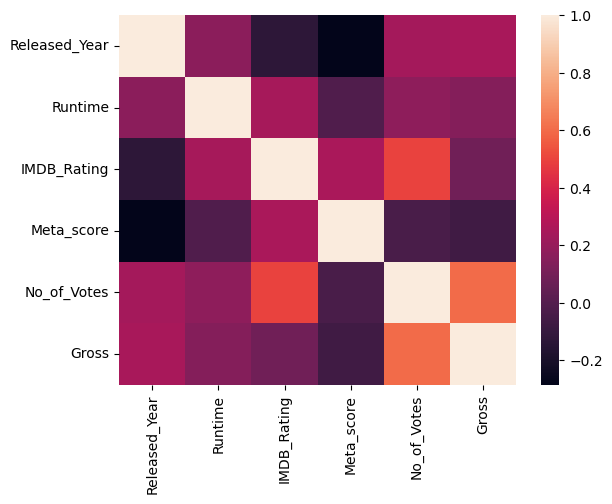

In [38]:
sns.heatmap(data.corr())

### Depicting the relationship between each column

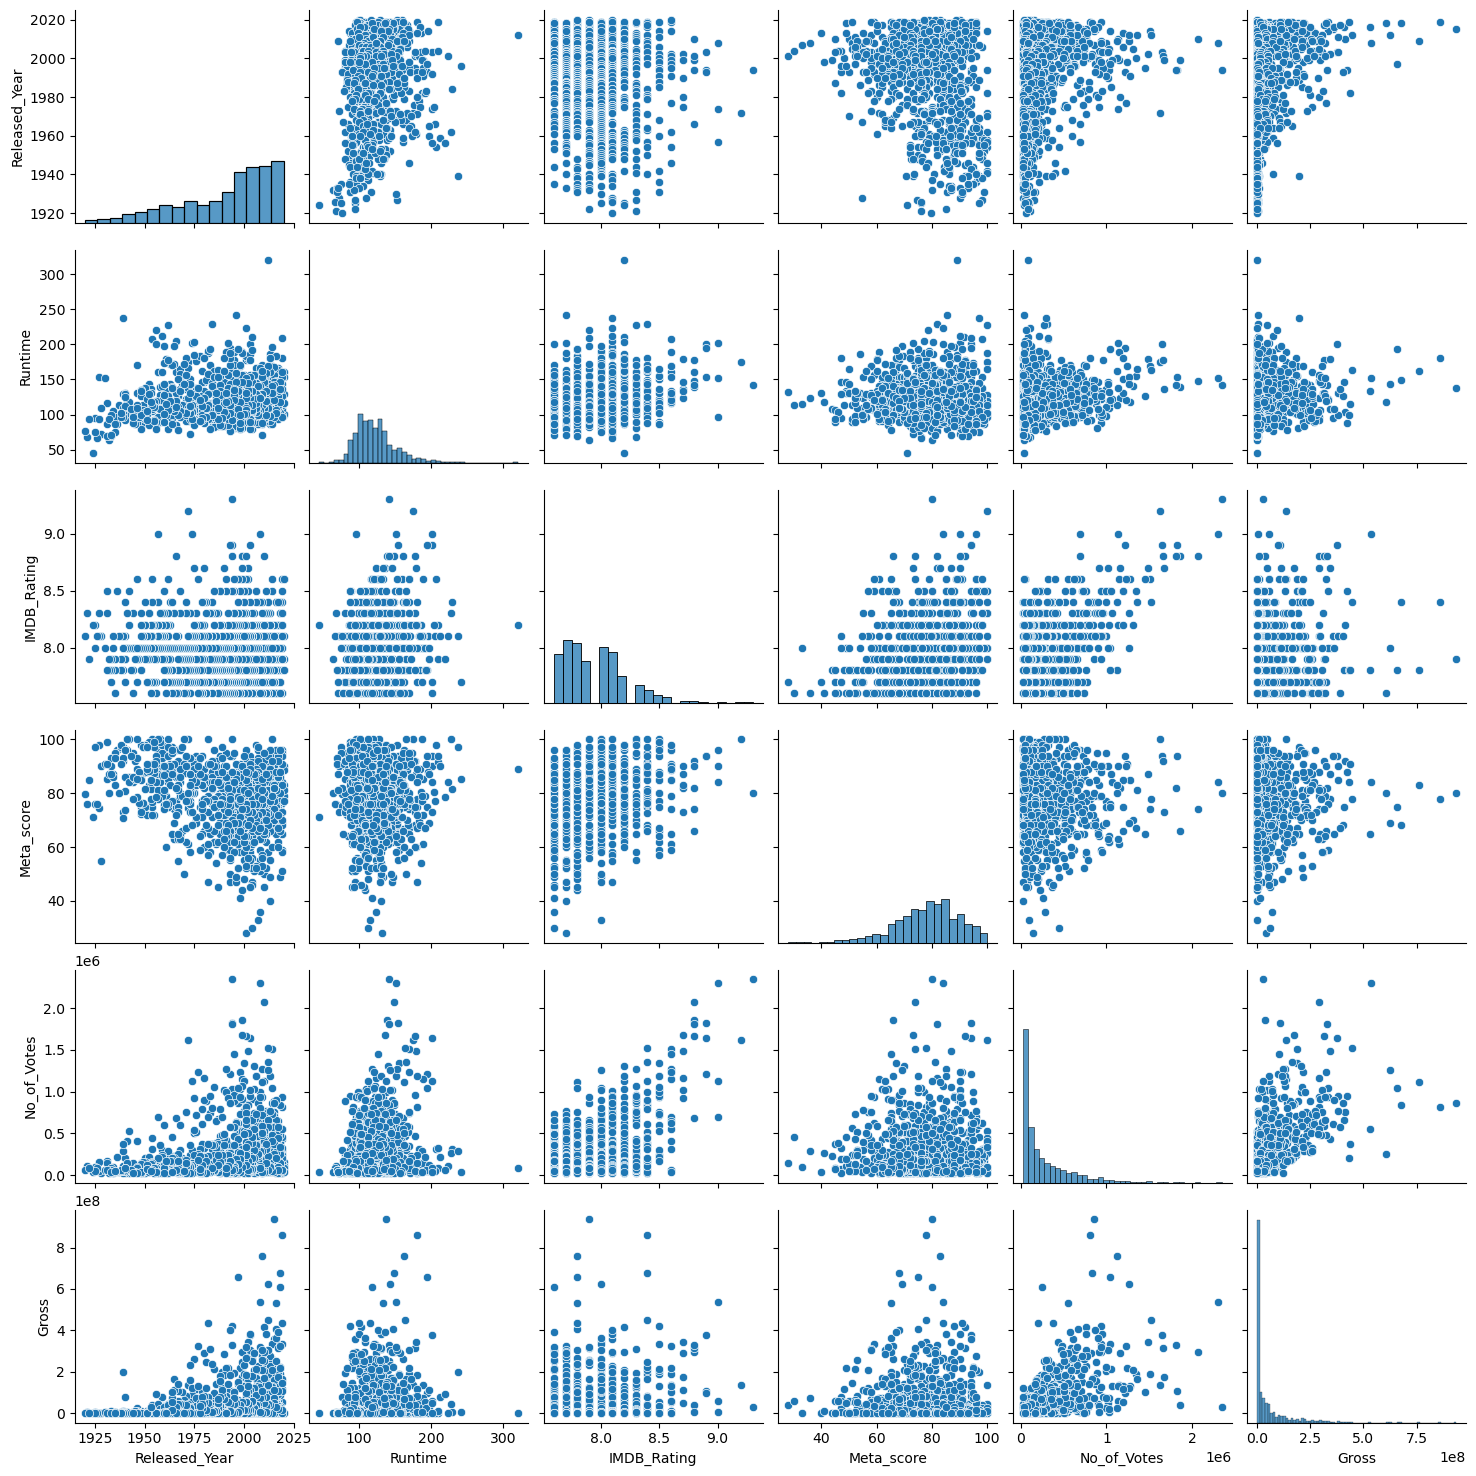

In [39]:
sns.pairplot(data)

### Distribution of each numeric column

array([[<Axes: title={'center': 'Released_Year'}>,
        <Axes: title={'center': 'Runtime'}>],
       [<Axes: title={'center': 'IMDB_Rating'}>,
        <Axes: title={'center': 'Meta_score'}>],
       [<Axes: title={'center': 'No_of_Votes'}>,
        <Axes: title={'center': 'Gross'}>]], dtype=object)

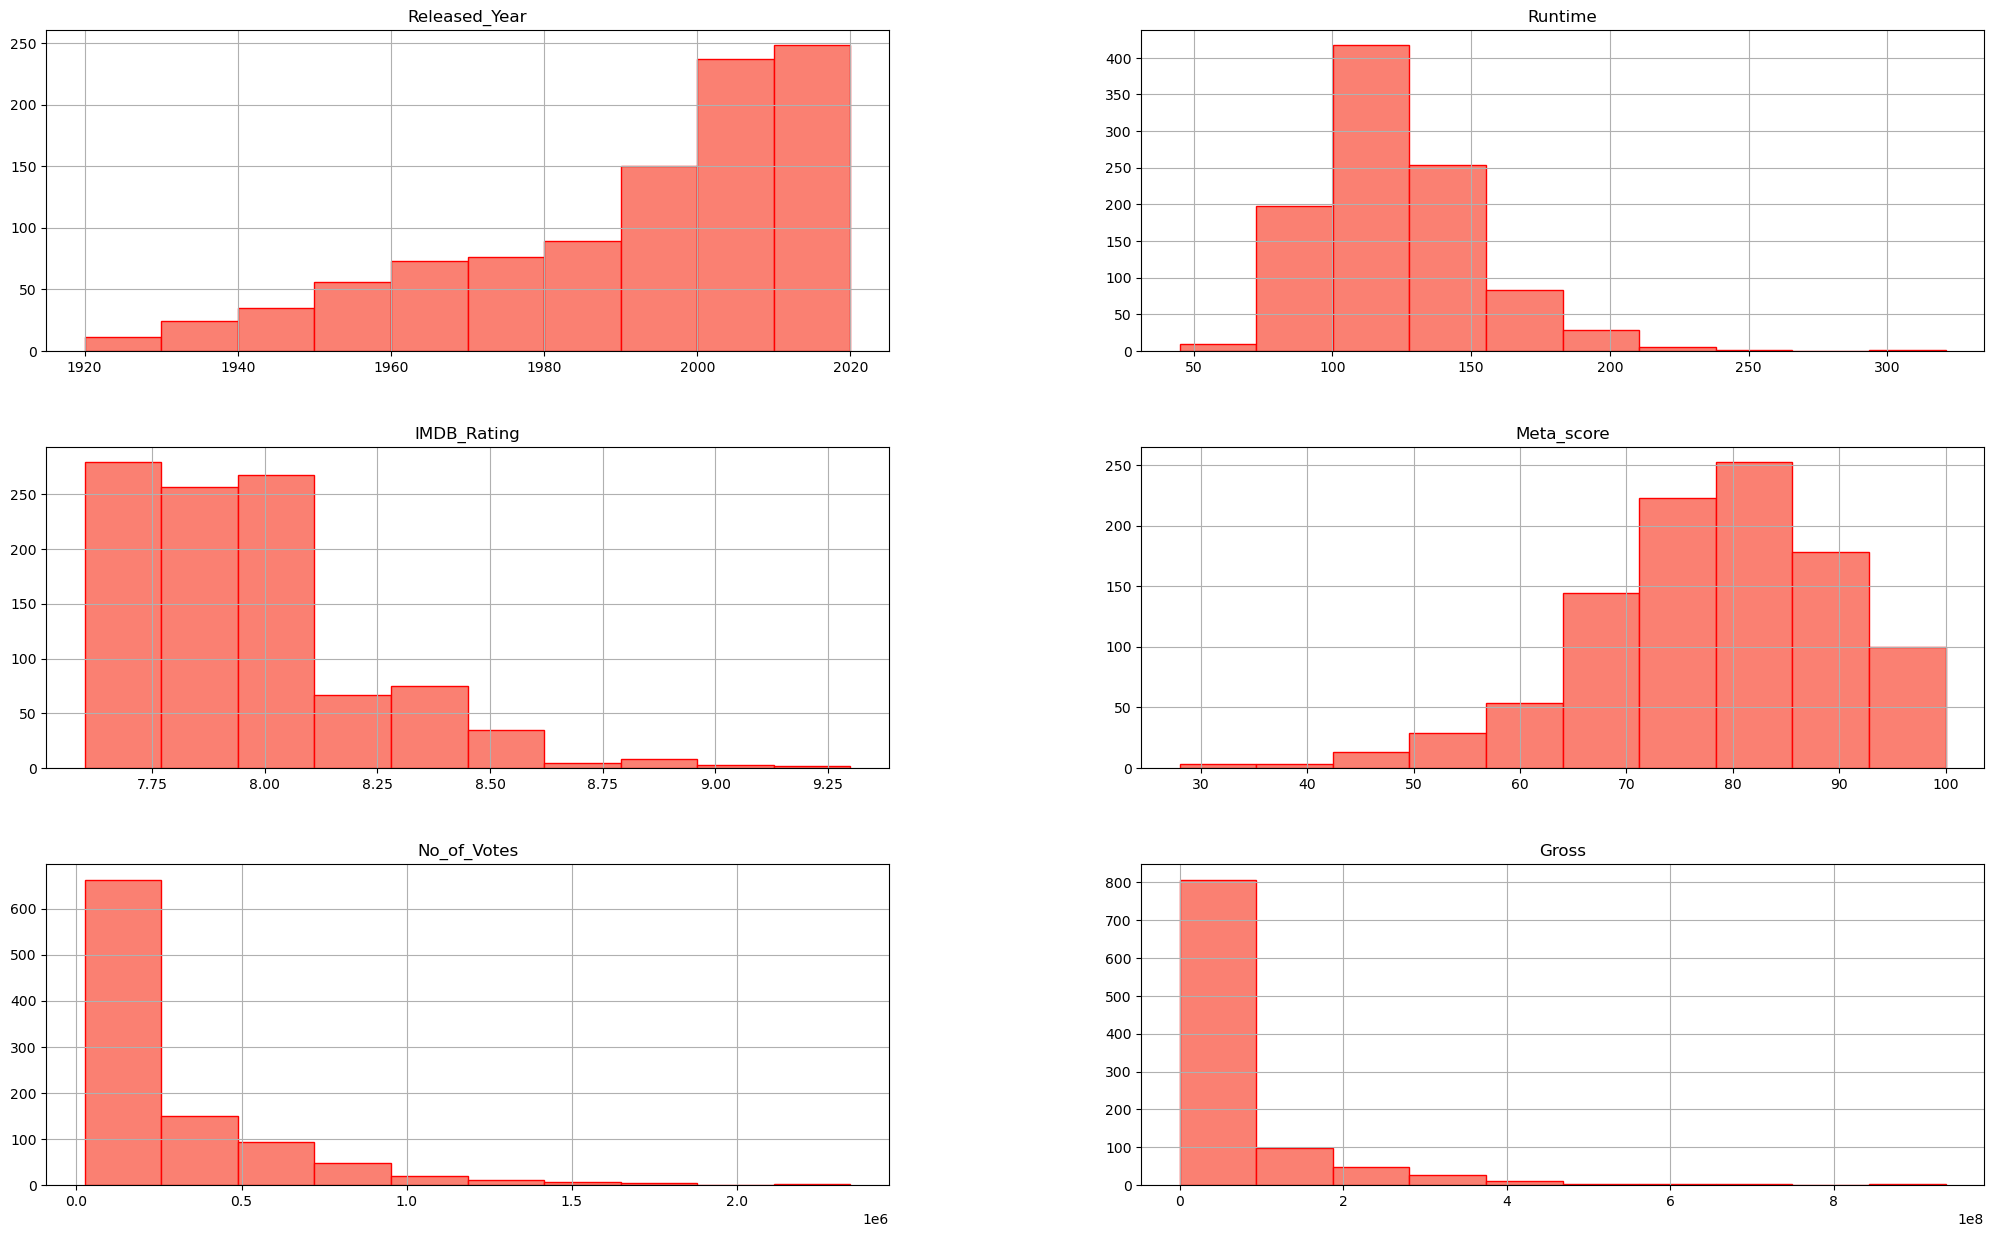

In [40]:
num_col=['Released_Year','Runtime','IMDB_Rating','Meta_score','No_of_Votes','Gross']
data[num_col].hist(figsize=(25,15),color='salmon',edgecolor='red')

# Top 10 Rated Movies

In [41]:
data.head(10)

Series_Title  Released_Year Certificate  \
0                       The Shawshank Redemption           1994           A   
1                                  The Godfather           1972           A   
2                                The Dark Knight           2008          UA   
3                         The Godfather: Part II           1974           A   
4                                   12 Angry Men           1957           U   
5  The Lord of the Rings: The Return of the King           2003           U   
6                                   Pulp Fiction           1994           A   
7                               Schindler's List           1993           A   
8                                      Inception           2010          UA   
9                                     Fight Club           1999           A   

   Runtime                      Genre              Director  \
0      142                      Drama        Frank Darabont   
1      175               Crime, Drama  Francis Ford Coppola   
2      152       Action, Crime, Drama     Christopher Nolan   
3      202               Crime, Drama  Francis Ford Coppola   
4       96               Crime, Drama          Sidney Lumet   
5      201   Action, Adventure, Drama         Peter Jackson   
6      154               Crime, Drama     Quentin Tarantino   
7      195  Biography, Drama, History      Steven Spielberg   
8      148  Action, Adventure, Sci-Fi     Christopher Nolan   
9      139                      Drama         David Fincher   

               Star1                 Star2              Star3  \
0        Tim Robbins        Morgan Freeman         Bob Gunton   
1      Marlon Brando             Al Pacino         James Caan   
2     Christian Bale          Heath Ledger      Aaron Eckhart   
3          Al Pacino        Robert De Niro      Robert Duvall   
4        Henry Fonda           Lee J. Cobb      Martin Balsam   
5        Elijah Wood       Viggo Mortensen       Ian McKellen   
6      John Travolta           Uma Thurman  Samuel L. Jackson   
7        Liam Neeson         Ralph Fiennes       Ben Kingsley   
8  Leonardo DiCaprio  Joseph Gordon-Levitt        Elliot Page   
9          Brad Pitt         Edward Norton          Meat Loaf   

              Star4  IMDB_Rating  Meta_score  No_of_Votes        Gross  
0    William Sadler          9.3        80.0    2343110.0   28341469.0  
1      Diane Keaton          9.2       100.0    1620367.0  134966411.0  
2     Michael Caine          9.0        84.0    2303232.0  534858444.0  
3      Diane Keaton          9.0        90.0    1129952.0   57300000.0  
4      John Fiedler          9.0        96.0     689845.0    4360000.0  
5     Orlando Bloom          8.9        94.0    1642758.0  377845905.0  
6      Bruce Willis          8.9        94.0    1826188.0  107928762.0  
7  Caroline Goodall          8.9        94.0    1213505.0   96898818.0  
8      Ken Watanabe          8.8        74.0    2067042.0  292576195.0  
9      Zach Grenier          8.8        66.0    1854740.0   37030102.0

# Top 10 Grossing movies

In [42]:
data.sort_values(by='Gross',ascending=False).head(10).reset_index()

index                                Series_Title  Released_Year  \
0    477  Star Wars: Episode VII - The Force Awakens           2015   
1     59                           Avengers: Endgame           2019   
2    623                                      Avatar           2009   
3     60                      Avengers: Infinity War           2018   
4    652                                     Titanic           1997   
5    357                                The Avengers           2012   
6    891                               Incredibles 2           2018   
7      2                             The Dark Knight           2008   
8    582                                   Rogue One           2016   
9     63                       The Dark Knight Rises           2012   

  Certificate  Runtime                         Genre           Director  \
0           U      138     Action, Adventure, Sci-Fi        J.J. Abrams   
1          UA      181      Action, Adventure, Drama      Anthony Russo   
2          UA      162    Action, Adventure, Fantasy      James Cameron   
3          UA      149     Action, Adventure, Sci-Fi      Anthony Russo   
4          UA      194                Drama, Romance      James Cameron   
5          UA      143     Action, Adventure, Sci-Fi        Joss Whedon   
6          UA      118  Animation, Action, Adventure          Brad Bird   
7          UA      152          Action, Crime, Drama  Christopher Nolan   
8          UA      133     Action, Adventure, Sci-Fi     Gareth Edwards   
9          UA      164             Action, Adventure  Christopher Nolan   

               Star1              Star2               Star3  \
0       Daisy Ridley        John Boyega         Oscar Isaac   
1          Joe Russo  Robert Downey Jr.         Chris Evans   
2    Sam Worthington        Zoe Saldana    Sigourney Weaver   
3          Joe Russo  Robert Downey Jr.     Chris Hemsworth   
4  Leonardo DiCaprio       Kate Winslet          Billy Zane   
5  Robert Downey Jr.        Chris Evans  Scarlett Johansson   
6    Craig T. Nelson       Holly Hunter        Sarah Vowell   
7     Christian Bale       Heath Ledger       Aaron Eckhart   
8     Felicity Jones         Diego Luna          Alan Tudyk   
9     Christian Bale          Tom Hardy       Anne Hathaway   

                Star4  IMDB_Rating  Meta_score  No_of_Votes        Gross  
0    Domhnall Gleeson          7.9        80.0     860823.0  936662225.0  
1        Mark Ruffalo          8.4        78.0     809955.0  858373000.0  
2  Michelle Rodriguez          7.8        83.0    1118998.0  760507625.0  
3        Mark Ruffalo          8.4        68.0     834477.0  678815482.0  
4         Kathy Bates          7.8        75.0    1046089.0  659325379.0  
5       Jeremy Renner          8.0        69.0    1260806.0  623279547.0  
6         Huck Milner          7.6        80.0     250057.0  608581744.0  
7       Michael Caine          9.0        84.0    2303232.0  534858444.0  
8          Donnie Yen          7.8        65.0     556608.0  532177324.0  
9         Gary Oldman          8.4        78.0    1516346.0  448139099.0

# Most Popular Genre

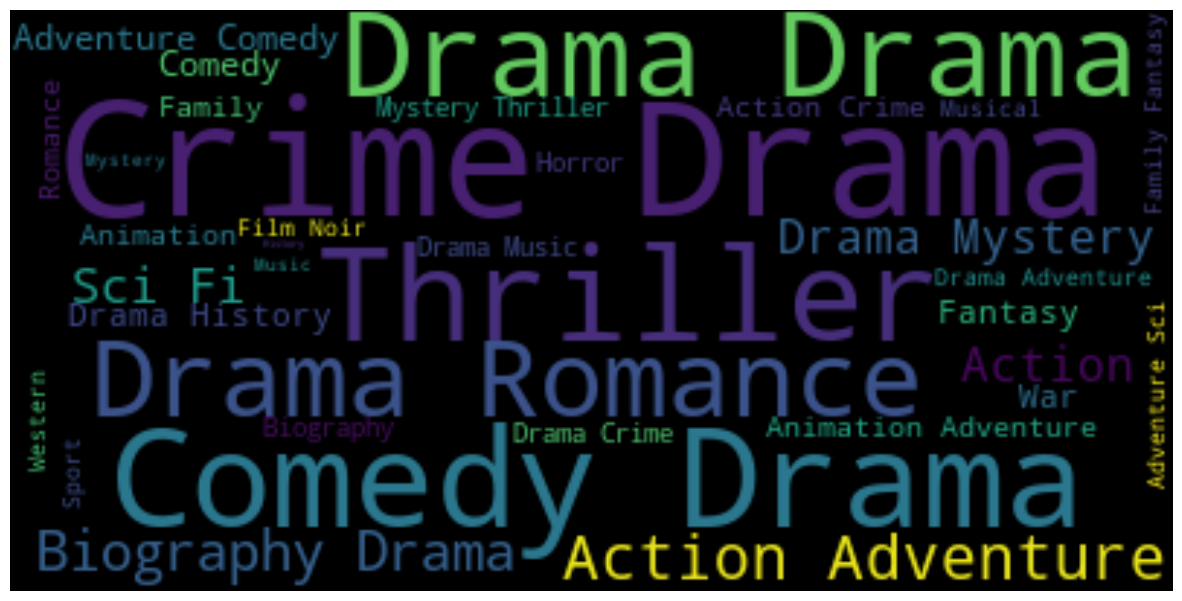

In [43]:
text=' '.join(i for i in data['Genre'])
sw=set(STOPWORDS)
wc=WordCloud(stopwords=sw,background_color='black').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

# Released_Year vs. IMDB_Rating

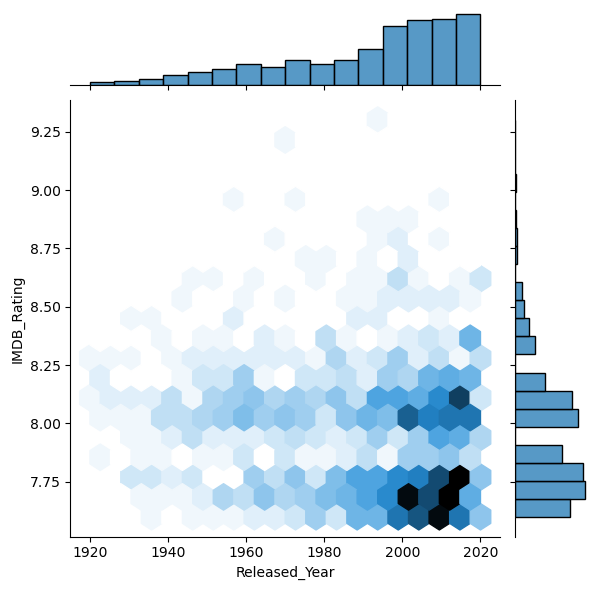

In [44]:
sns.jointplot(data=data,x='Released_Year',y='IMDB_Rating',kind='hex')

# IMDB_Rating yearly trend

In [45]:
rating=data[['Released_Year','IMDB_Rating']]
rating=rating.groupby('Released_Year').agg(np.mean)
rating

IMDB_Rating
Released_Year             
1920              8.100000
1921              8.300000
1922              7.900000
1924              8.200000
1925              8.100000
...                    ...
2016              7.935714
2017              7.890909
2018              7.994737
2019              7.995652
2020              8.133333

[99 rows x 1 columns]

<Axes: xlabel='Released_Year', ylabel='IMDB_Rating'>

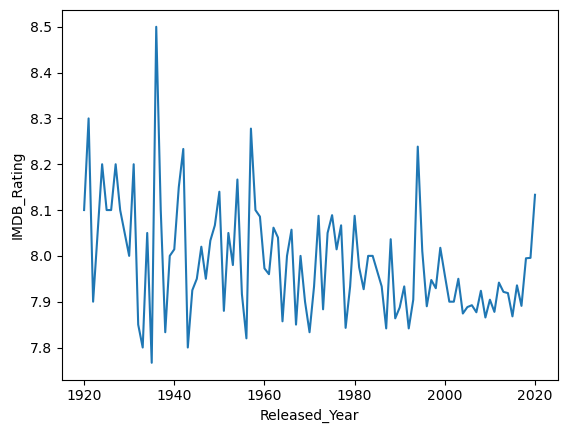

In [46]:
sns.lineplot(data=rating,x=rating.index,y='IMDB_Rating')

# IMDB_Rating vs. Runtime

In [47]:
runtime=data[['Runtime','IMDB_Rating']]
runtime=runtime.groupby('Runtime').agg(np.mean)
runtime

IMDB_Rating
Runtime             
45               8.2
64               7.9
67               8.1
68               8.3
69               7.8
...              ...
228              8.3
229              8.4
238              8.1
242              7.7
321              8.2

[140 rows x 1 columns]

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\utils.py:122: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


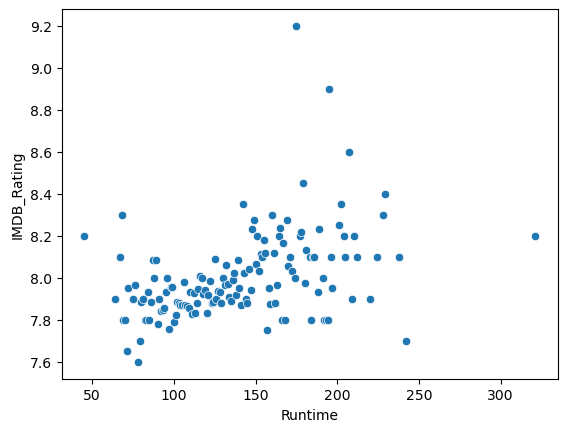

In [48]:
sns.scatterplot(data=runtime,x=runtime.index,y='IMDB_Rating',cmap='Blues')
plt.show()

# Count of Certificates

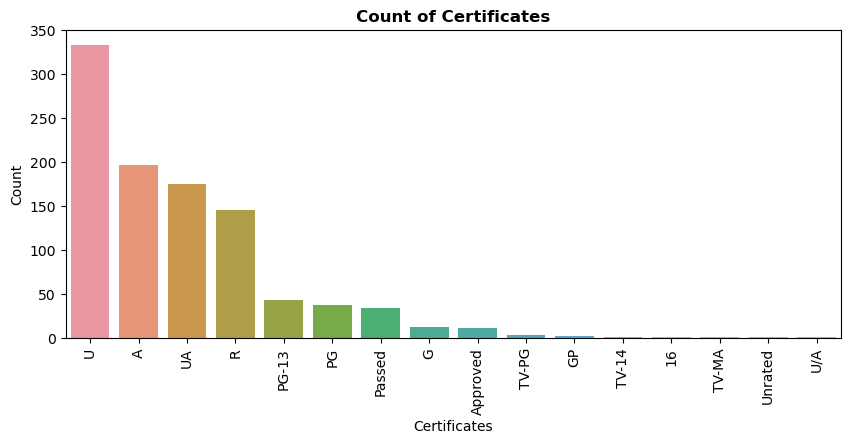

In [49]:
plt.figure(figsize=(10,4))
sns.countplot(x='Certificate',data=data,order=data['Certificate'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Count of Certificates',fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Certificates')
plt.show()

# Top 5 Directors with highest no. of contents

In [50]:
data['Director'].value_counts().head()

Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
Name: Director, dtype: int64

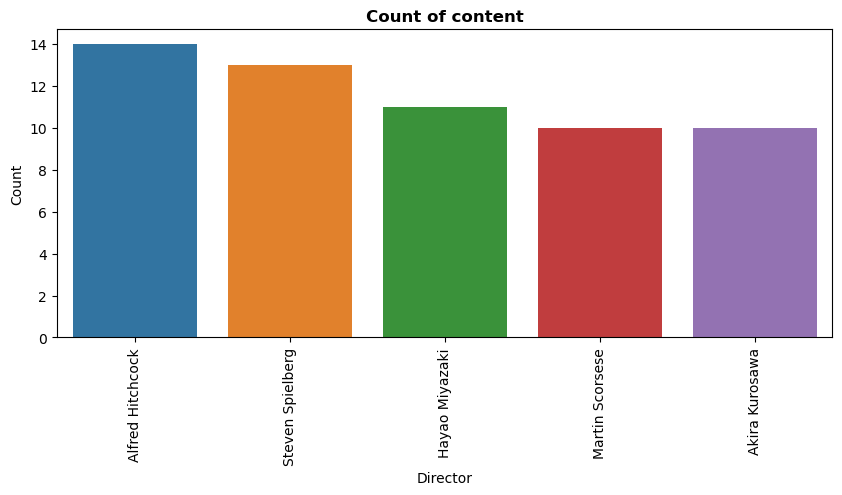

In [51]:
plt.figure(figsize=(10,4))
sns.countplot(x='Director',data=data,order=data['Director'].value_counts().head().index)
plt.xticks(rotation='vertical')
plt.title('Count of content', fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Director')
plt.show()

# IMDB Rating of these Directors

In [52]:
avg=data[['Director','IMDB_Rating']]
avg=avg[avg['Director'].isin(['Alfred Hitchcock','Steven Spielberg','Hayao Miyazaki','Martin Scorsese','Akira Kurosawa'])]
avg=avg.groupby(by='Director')['IMDB_Rating'].max()
avg=pd.DataFrame({'Director':avg.index,'IMDB_Rating':avg.values})
avg

Director  IMDB_Rating
0    Akira Kurosawa          8.6
1  Alfred Hitchcock          8.5
2    Hayao Miyazaki          8.6
3   Martin Scorsese          8.7
4  Steven Spielberg          8.9

In [53]:
px.bar(avg,x='Director',y='IMDB_Rating',title='Average IMDB Rating of the 5 Directors having most content')

# Most popular Director

In [54]:
avg.iloc[-1]

Director       Steven Spielberg
IMDB_Rating                 8.9
Name: 4, dtype: object

In [55]:
df=data[data['Director']=='Steven Spielberg']
df=df.sort_values(by='Released_Year')
df

Series_Title  Released_Year Certificate  Runtime  \
415                                Jaws           1975           A      124   
988  Close Encounters of the Third Kind           1977           U      138   
72              Raiders of the Lost Ark           1981           A      115   
688          E.T. the Extra-Terrestrial           1982           U      115   
682                    The Color Purple           1985           U      154   
832                   Empire of the Sun           1987           U      153   
168  Indiana Jones and the Last Crusade           1989           U      127   
7                      Schindler's List           1993           A      195   
262                       Jurassic Park           1993          UA      127   
24                  Saving Private Ryan           1998           R      169   
243                 Catch Me If You Can           2002           A      141   
951                     Minority Report           2002           A      145   
890                     Bridge of Spies           2015          UA      142   

                         Genre          Director              Star1  \
415        Adventure, Thriller  Steven Spielberg       Roy Scheider   
988              Drama, Sci-Fi  Steven Spielberg   Richard Dreyfuss   
72           Action, Adventure  Steven Spielberg      Harrison Ford   
688             Family, Sci-Fi  Steven Spielberg       Henry Thomas   
682                      Drama  Steven Spielberg       Danny Glover   
832     Action, Drama, History  Steven Spielberg     Christian Bale   
168          Action, Adventure  Steven Spielberg      Harrison Ford   
7    Biography, Drama, History  Steven Spielberg        Liam Neeson   
262  Action, Adventure, Sci-Fi  Steven Spielberg          Sam Neill   
24                  Drama, War  Steven Spielberg          Tom Hanks   
243    Biography, Crime, Drama  Steven Spielberg  Leonardo DiCaprio   
951     Action, Crime, Mystery  Steven Spielberg         Tom Cruise   
890   Drama, History, Thriller  Steven Spielberg          Tom Hanks   

                 Star2               Star3                 Star4  IMDB_Rating  \
415        Robert Shaw    Richard Dreyfuss         Lorraine Gary          8.0   
988  François Truffaut           Teri Garr        Melinda Dillon          7.6   
72         Karen Allen        Paul Freeman      John Rhys-Davies          8.4   
688     Drew Barrymore        Peter Coyote           Dee Wallace          7.8   
682    Whoopi Goldberg       Oprah Winfrey        Margaret Avery          7.8   
832     John Malkovich  Miranda Richardson          Nigel Havers          7.7   
168       Sean Connery        Alison Doody       Denholm Elliott          8.2   
7        Ralph Fiennes        Ben Kingsley      Caroline Goodall          8.9   
262         Laura Dern       Jeff Goldblum  Richard Attenborough          8.1   
24          Matt Damon        Tom Sizemore          Edward Burns          8.6   
243          Tom Hanks  Christopher Walken          Martin Sheen          8.1   
951      Colin Farrell     Samantha Morton         Max von Sydow          7.6   
890       Mark Rylance           Alan Alda              Amy Ryan          7.6   

     Meta_score  No_of_Votes        Gross  
415        87.0     543388.0  260000000.0  
988        90.0     184966.0  132088635.0  
72         85.0     884112.0  248159971.0  
688        91.0     372490.0  435110554.0  
682        78.0      78321.0   98467863.0  
832        62.0     115677.0   22238696.0  
168        65.0     692366.0  197171806.0  
7          94.0    1213505.0   96898818.0  
262        68.0     867615.0  402453882.0  
24         91.0    1235804.0  216540909.0  
243        75.0     832846.0  164615351.0  
951        80.0     508417.0  132072926.0  
890        81.0     287659.0   72313754.0

# IMDB Rating Yearly Trend for Steven Spielberg Movies

In [56]:
px.line(df,x='Released_Year',y='IMDB_Rating',title='Released Year vs. IMDB Rating', template= "plotly_dark")

# Gross yearly trend

In [57]:
px.line(df,x= 'Released_Year' , y = 'Gross', title='Released Year vs. Gross', template= "plotly_dark")

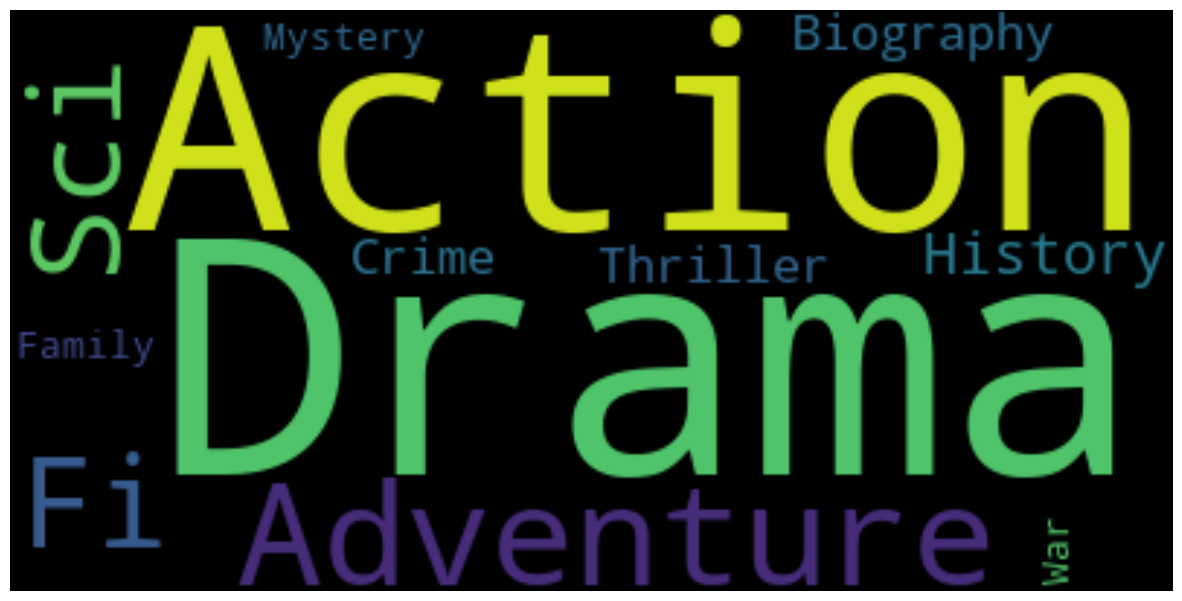

In [58]:
text=' '.join(i for i in df['Genre'])
sw=set(STOPWORDS)
wc=WordCloud(stopwords=sw,background_color='black').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

# Top 10 Directors with highest average IMDB Rating

In [59]:
rating=data[['Director','IMDB_Rating']]
rating=rating.groupby('Director').agg(np.mean)
rating.sort_values(by='IMDB_Rating',ascending=False,inplace=True)
rating=rating.head(10)
rating

IMDB_Rating
Director                       
Frank Darabont             8.95
Irvin Kershner             8.70
Lana Wachowski             8.70
George Lucas               8.60
Roberto Benigni            8.60
Masaki Kobayashi           8.60
Thomas Kail                8.60
Sudha Kongara              8.60
Fernando Meirelles         8.60
Roger Allers               8.50

In [60]:
px.bar(data_frame=rating,x=rating.index,y='IMDB_Rating',template='plotly_dark')

# Director with highest average IMDB Rating

In [61]:
rating.iloc[0]

IMDB_Rating    8.95
Name: Frank Darabont, dtype: float64

In [62]:
d1=data[data['Director']=='Frank Darabont']
d1=d1.sort_values(by='Released_Year')
d1

Series_Title  Released_Year Certificate  Runtime  \
0   The Shawshank Redemption           1994           A      142   
25            The Green Mile           1999           A      189   

                    Genre        Director        Star1                  Star2  \
0                   Drama  Frank Darabont  Tim Robbins         Morgan Freeman   
25  Crime, Drama, Fantasy  Frank Darabont    Tom Hanks  Michael Clarke Duncan   

          Star3           Star4  IMDB_Rating  Meta_score  No_of_Votes  \
0    Bob Gunton  William Sadler          9.3        80.0    2343110.0   
25  David Morse     Bonnie Hunt          8.6        61.0    1147794.0   

          Gross  
0    28341469.0  
25  136801374.0

# Frank Darabont movies' IMDB Rating Yearly Trend

In [63]:
px.line(d1,x= 'Released_Year' , y = 'IMDB_Rating', title='Released Year vs. IMDB Rating', template= "plotly_dark")

# Grossly yearly trend line

In [64]:
px.line(d1,x= 'Released_Year' , y = 'Gross', title='Released Year vs. Gross', template= "plotly_dark")

# Certificate distribution of Movies

In [65]:
px.scatter(data, x="Released_Year", y="IMDB_Rating", color="Certificate", size="Gross",hover_name="Series_Title", hover_data=['Runtime','Genre','Director','Meta_score'])

Since the Size of the bubbles is determined by the Gross value therefore there might be some dots which are not visible but it shows the information as they have 0 Gross value

In [66]:
data.groupby(by="Certificate")["Gross"].mean().sort_values()

Certificate
16          0.000000e+00
TV-14       0.000000e+00
TV-MA       0.000000e+00
TV-PG       3.555400e+04
Unrated     3.000000e+05
GP          7.089580e+05
Passed      3.676992e+06
Approved    3.790371e+06
PG          1.160320e+07
R           2.385025e+07
U/A         2.602096e+07
PG-13       3.351085e+07
G           4.133027e+07
U           5.222642e+07
A           5.837403e+07
UA          1.221531e+08
Name: Gross, dtype: float64

This is the exploratory analysis of the IMDB dataset